In [1]:
#This code is referred from multiple Youtube Videos, Links for them are as below:
# https://youtu.be/BEx0KLyrIFQ
# https://youtu.be/iqQgED9vV7k 

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

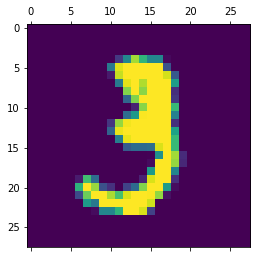

In [8]:
plt.matshow(X_train[10])

In [9]:
y_train[10]

3

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train/255
X_test = X_test/255 #normalization

In [12]:
Xtrain_Flattened = X_train.reshape(len(X_train),28*28)
Xtrain_Flattened.shape

(60000, 784)

In [13]:
Xtest_Flattened = X_test.reshape(len(X_test),28*28)
Xtest_Flattened.shape

(10000, 784)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') #dense means each & every layer is connected to each other, 10 is output shape
])
#Added more layers than the referred code, resulted in higher accuracy
#different optimizer(tried ftrl optimizer, got accuracy below 15%), tried with mean absolute error loss, got accuracy below 10%
model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xtrain_Flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.3194 - accuracy: 0.9100
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1424 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1031 - accuracy: 0.9698
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0803 - accuracy: 0.9762
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0648 - accuracy: 0.9806


In [15]:
model.evaluate(Xtest_Flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9755


[0.08368262648582458, 0.9754999876022339]

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


In [17]:
y_predicted = model.predict(Xtest_Flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([7.9824910e-02, 6.4233635e-03, 5.4052937e-01, 9.5667750e-01,
       1.1402905e-04, 6.0497038e-02, 8.5660645e-07, 9.9998015e-01,
       6.9080019e-01, 6.4839953e-01], dtype=float32)

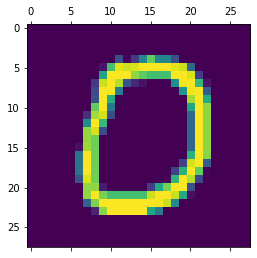

In [18]:
plt.matshow(X_test[10])

In [19]:
np.argmax(y_predicted[10])

0

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [22]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    1,    1,    2,    0,    3,    3,    0],
       [   0, 1122,    4,    1,    0,    1,    5,    0,    2,    0],
       [   6,    0, 1008,    3,    3,    1,    2,    6,    3,    0],
       [   0,    0,    3,  988,    0,    9,    0,    5,    4,    1],
       [   3,    0,    7,    0,  959,    0,    2,    3,    1,    7],
       [   2,    0,    0,    4,    1,  880,    3,    0,    1,    1],
       [  10,    3,    0,    1,    7,    9,  923,    1,    4,    0],
       [   0,    6,    7,    1,    0,    2,    0, 1005,    1,    6],
       [   7,    0,    2,    8,    5,    7,    4,    5,  934,    2],
       [   5,    4,    1,    9,    9,    7,    0,    5,    3,  966]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

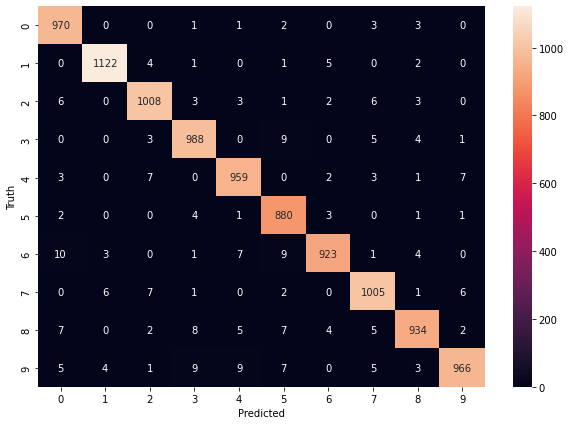

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')